# EDA Compression resistance

## Library loading, settings and dataset load

Hide warnings 

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Main libraries load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Additional libraries

In [3]:
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr

Set matplotlib parameters

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Load Compression resistance dataset

In [5]:
path = '/Users/manolo/Documents/Docencia/Tesis Doctorales/Elena Albeira Guirado Lucinio/Resistencia fuego/Datasets/'

In [6]:
df = pd.read_excel(path + 'CR.xlsx')

In [7]:
df.head()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,...,Orujillo ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,1.320439,0.4,1309.000000,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.320439,0.4,1371.000000,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.700407,0.4,849.841788,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.953013,0.4,1042.269832,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.998941,0.4,1050.458259,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset exploring and cleaning

Checking duplicates

In [8]:
len(df) - len(df.drop_duplicates())

1

Drop duplicate

In [9]:
df = df.drop_duplicates()

Dataset variable info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 92
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rc                  92 non-null     float64
 1   Water/solid ratio   92 non-null     float64
 2   Density             92 non-null     float64
 3   Gypsum              61 non-null     float64
 4   Vermiculite         15 non-null     float64
 5   Fiberglass          9 non-null      float64
 6   PP Fiber            3 non-null      float64
 7   Coal Fly Ash        34 non-null     float64
 8   Incineration ash    4 non-null      float64
 9   APC waste           1 non-null      float64
 10  Portland concrete   31 non-null     float64
 11  Ladle slag          2 non-null      float64
 12  Orujillo slag       5 non-null      float64
 13  Orujillo ash        14 non-null     float64
 14  Cardoon ash         4 non-null      float64
 15  Poplar ash          2 non-null      float64
 16  MSW ash        

Exploring missing values

In [11]:
for name in df.columns:
    column = df[name]
    NaN = sum(column.isnull())
    print ('Number of null values in the column', name, 'is: ', NaN)

Number of null values in the column Rc is:  0
Number of null values in the column Water/solid ratio is:  0
Number of null values in the column Density is:  0
Number of null values in the column Gypsum is:  31
Number of null values in the column Vermiculite is:  77
Number of null values in the column Fiberglass is:  83
Number of null values in the column PP Fiber is:  89
Number of null values in the column Coal Fly Ash is:  58
Number of null values in the column Incineration ash is:  88
Number of null values in the column APC waste is:  91
Number of null values in the column Portland concrete is:  61
Number of null values in the column Ladle slag is:  90
Number of null values in the column Orujillo slag is:  87
Number of null values in the column Orujillo ash is:  78
Number of null values in the column Cardoon ash is:  88
Number of null values in the column Poplar ash is:  90
Number of null values in the column MSW ash is:  88
Number of null values in the column Cl2Mg is:  90
Number of 

<Axes: >

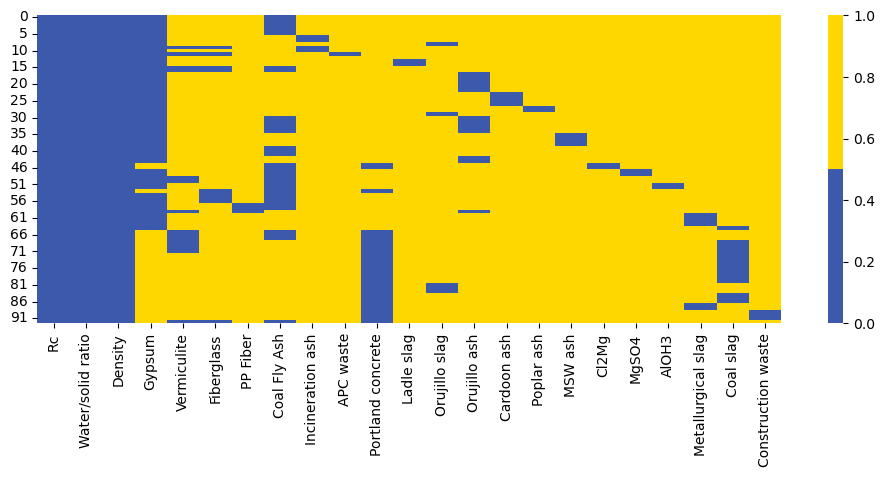

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(['#3D59AB', '#FFD700']))

Yellow = 'missing'; Blue = 'no missing'.

The missing values correspond to zero, as they represent compositions

Filling NaN with 0

In [13]:
df.fillna(value = 0, inplace = True)

In [14]:
df.head()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,...,Orujillo ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,1.320439,0.4,1309.000000,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.320439,0.4,1371.000000,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.700407,0.4,849.841788,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.953013,0.4,1042.269832,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.998941,0.4,1050.458259,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory data analysis (EDA)

Preliminary statistics analysis

In [15]:
df.describe()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,...,Orujillo ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,2.059502,0.504457,1164.707259,16.307609,2.304348,0.078261,0.038043,26.869565,3.260870,0.652174,...,8.347826,3.478261,1.739130,3.478261,0.163043,0.163043,0.135870,3.804348,13.152174,2.608696
std,1.951133,0.278692,309.786371,17.089932,5.708561,0.322704,0.237127,36.203702,15.485455,6.255432,...,23.291009,16.403885,11.730368,16.403885,1.160496,1.160496,0.934983,15.537434,28.782219,14.286670
min,0.050000,0.300000,570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.400000,911.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.300000,0.400000,1200.500000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000,0.450000,1341.206793,20.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.600000,1.775000,2271.000000,100.000000,20.000000,2.700000,2.000000,80.000000,80.000000,60.000000,...,80.000000,80.000000,80.000000,80.000000,10.000000,10.000000,7.500000,80.000000,80.000000,80.000000


<Axes: >

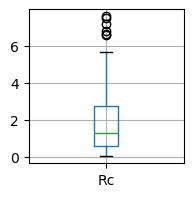

In [16]:
fig, ax = plt.subplots(figsize=(2, 2))
df.boxplot(column = ['Rc'])

<Axes: >

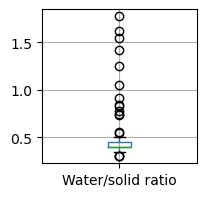

In [17]:
fig, ax = plt.subplots(figsize=(2, 2))
df.boxplot(column = ['Water/solid ratio'])

<Axes: >

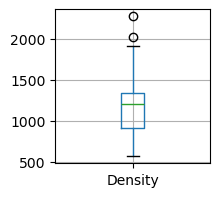

In [18]:
fig, ax = plt.subplots(figsize=(2, 2))
df.boxplot(column = ['Density'])

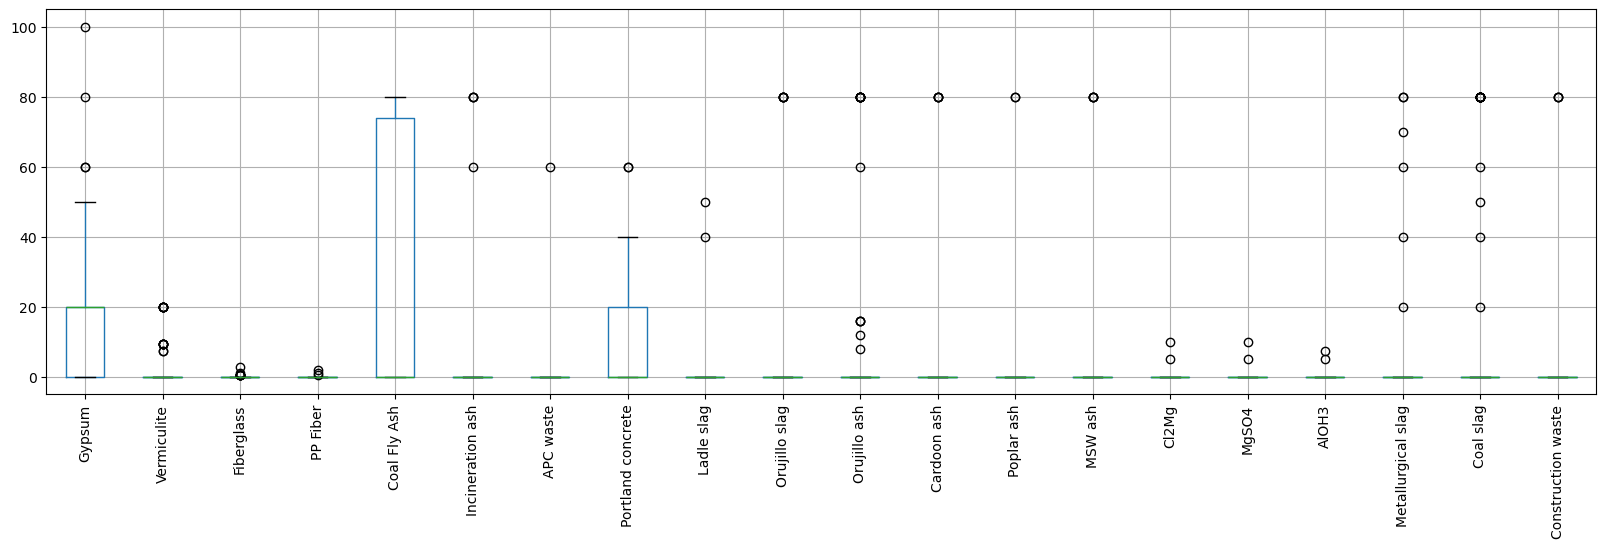

In [19]:
comp_list = [col for col in df.columns if col not in ['Rc', 'Water/solid ratio', 'Density']]
fig, ax = plt.subplots(figsize=(20, 5))
df.boxplot(column=comp_list, ax=ax)
ax.tick_params(axis='x', rotation=90)
plt.show()

Univariate Histograms

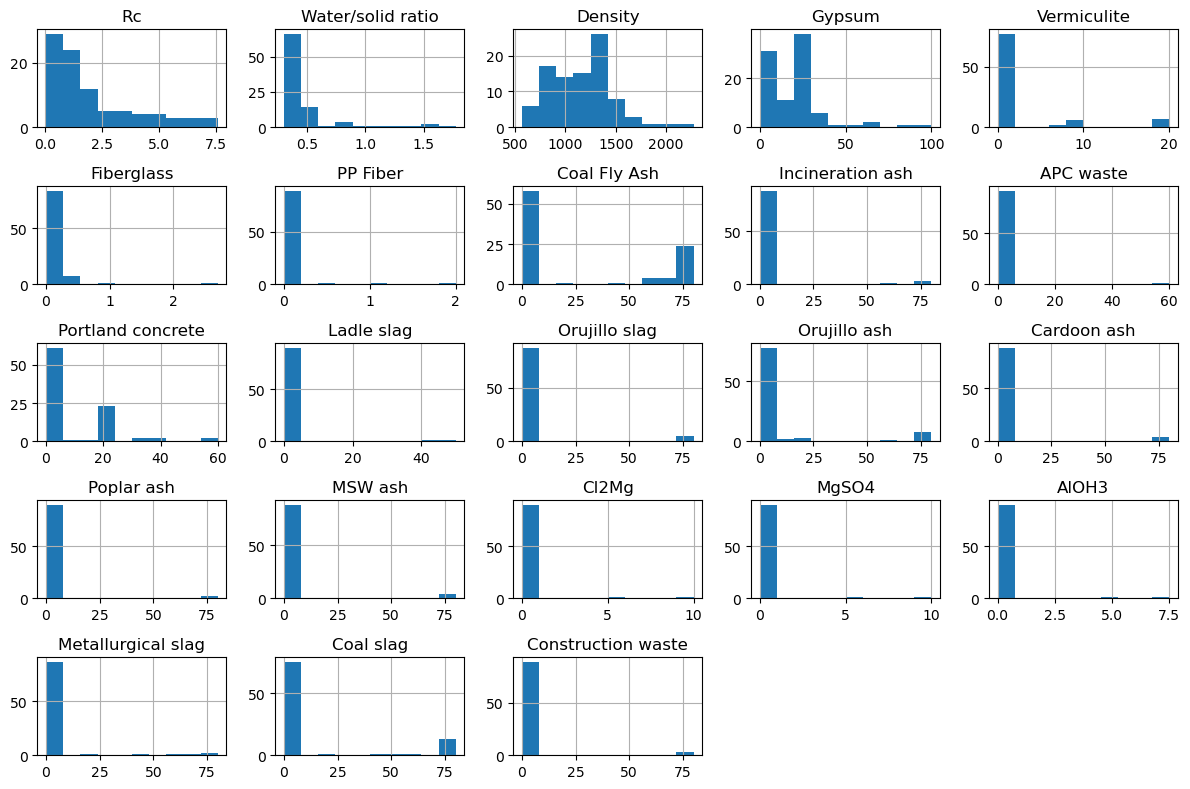

In [20]:
df.hist()
plt.tight_layout()
plt.show()

Density Plots

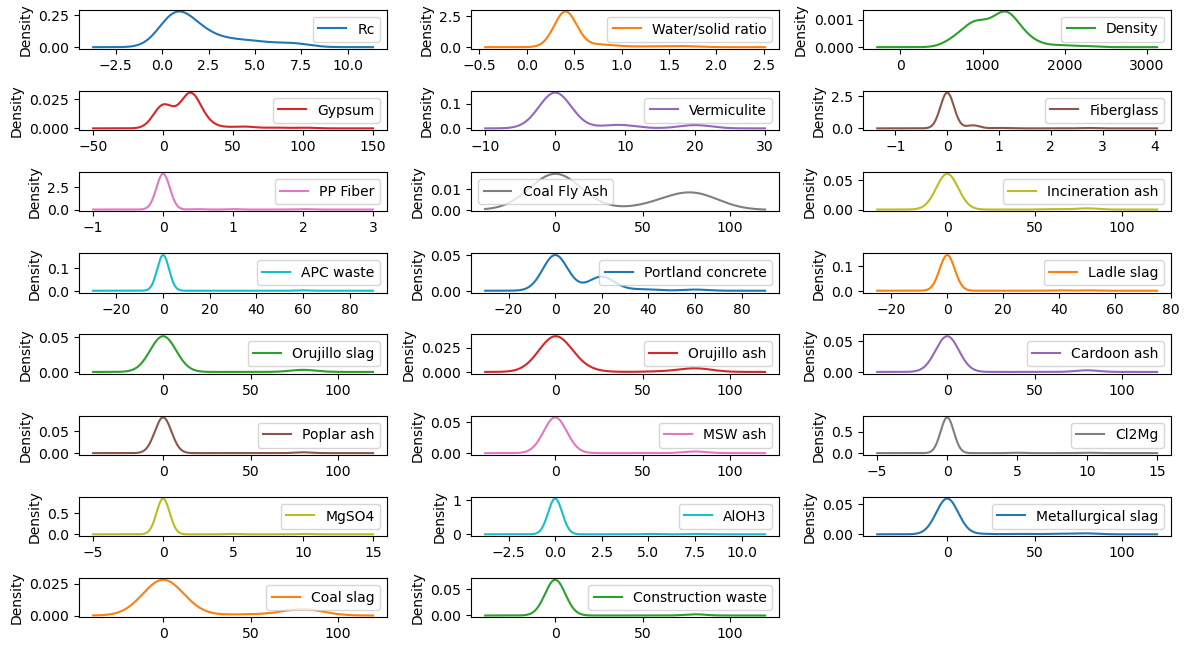

In [21]:
df.plot(kind='density', subplots=True, layout=(10,3), sharex=False)
plt.tight_layout()
plt.show()

Scatterplot matrix

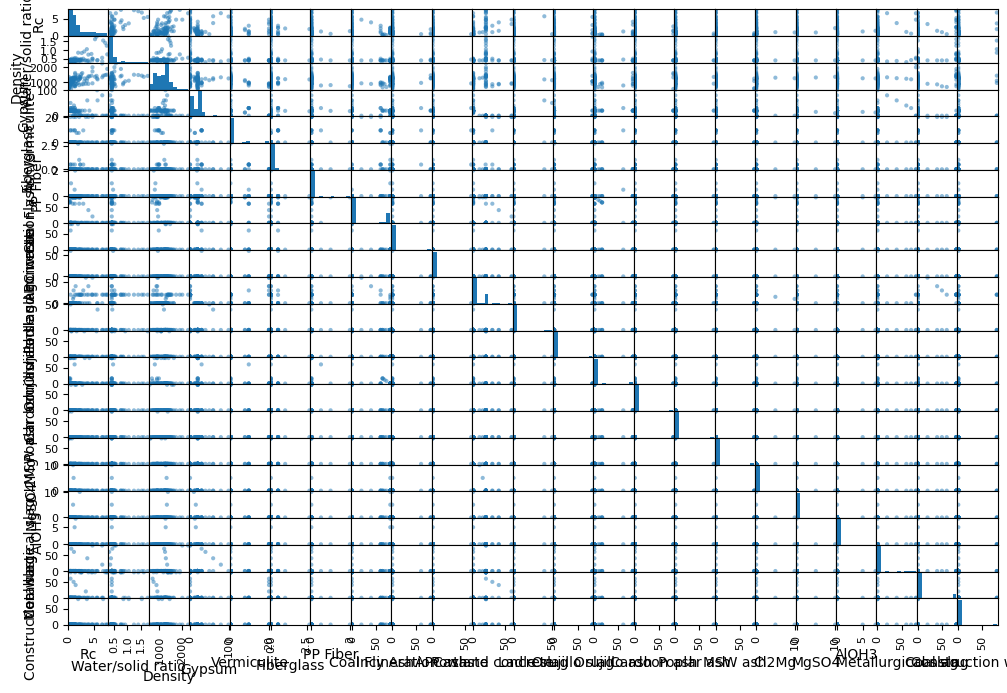

In [22]:
scatter_matrix(df)
plt.show()

Pairplot matrix

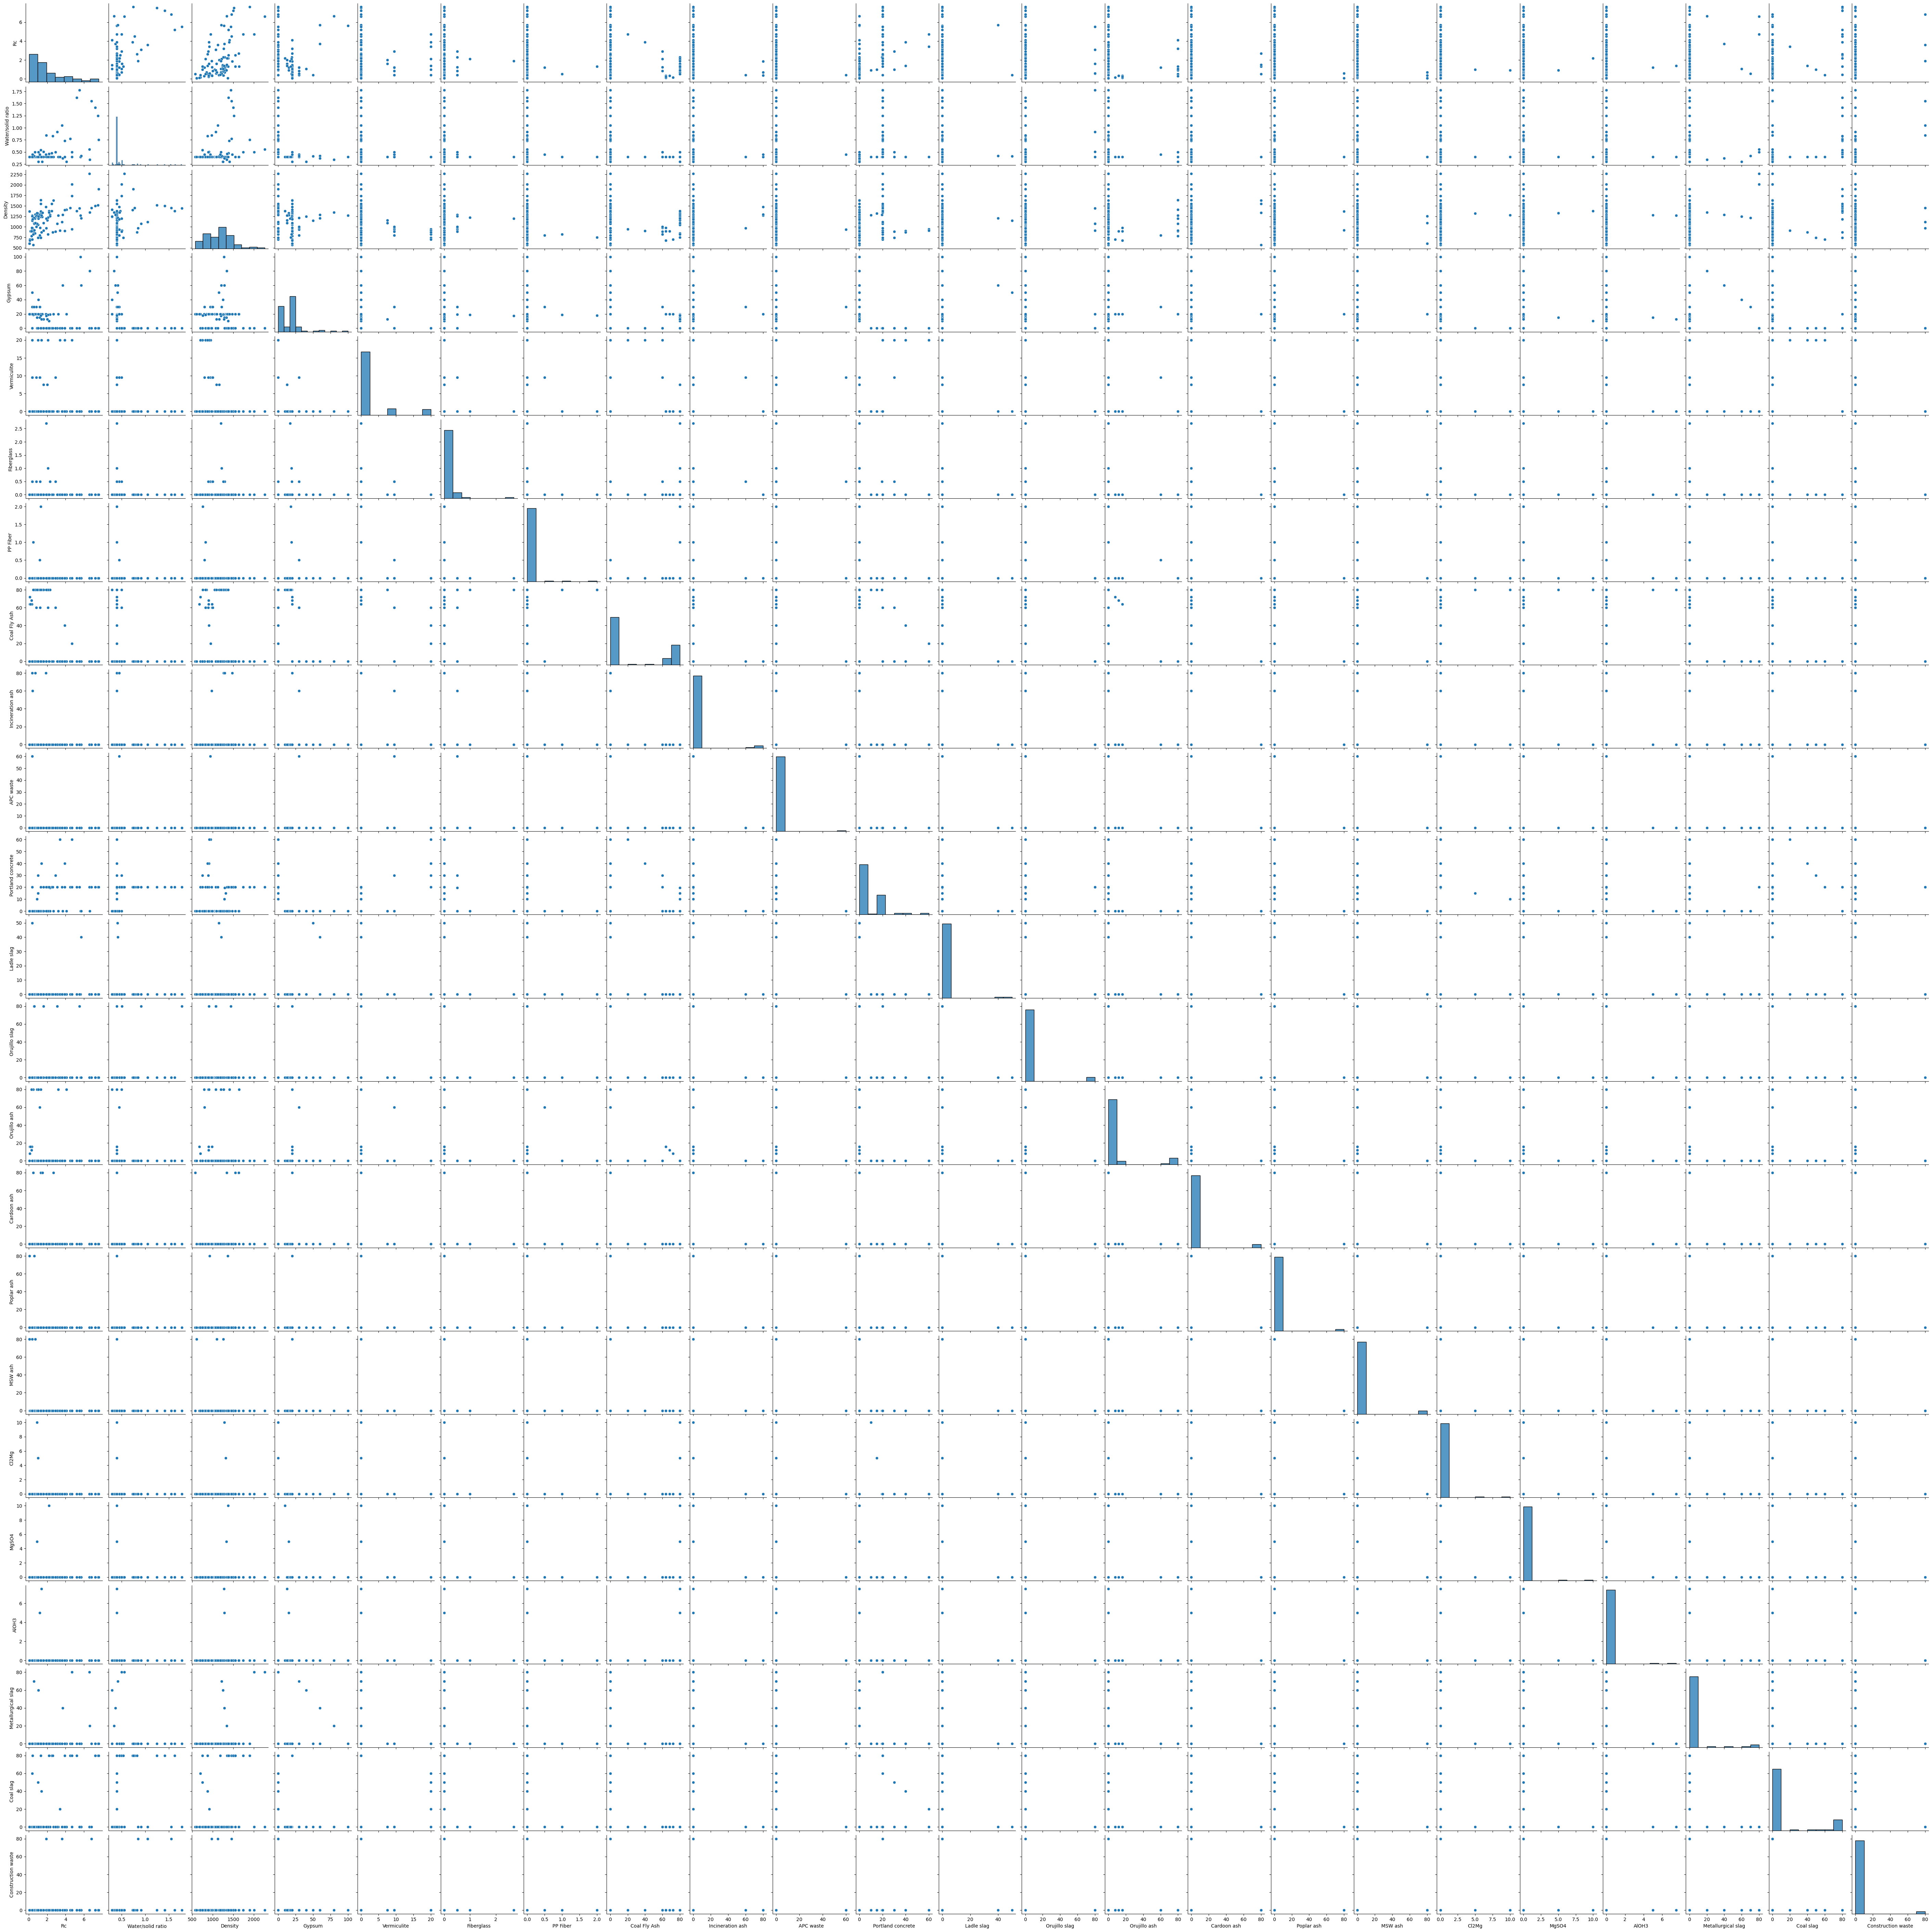

In [23]:
sns.pairplot(df)
plt.show()

Correlation diagram

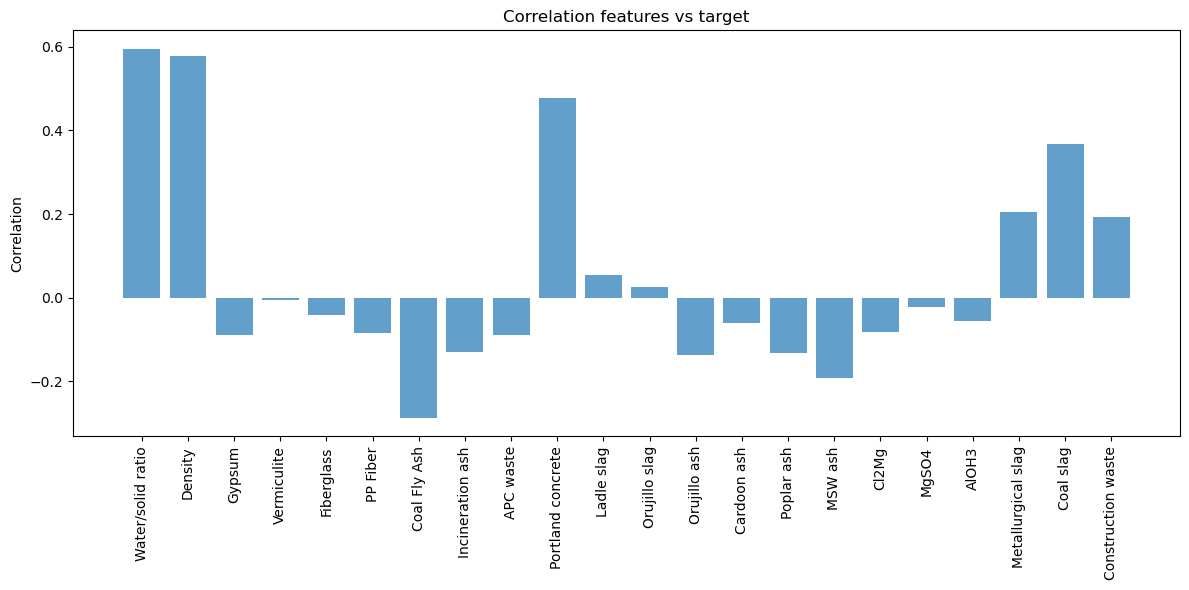

In [24]:
features = [col for col in df.columns if col != 'Rc']

corr = [pearsonr(df[feature], df['Rc'])[0] for feature in features]

y_pos = np.arange(len(features))
plt.figure(figsize=(12, 6)) 
plt.bar(y_pos, corr, align='center', alpha=0.7)
plt.xticks(y_pos, features, rotation=90)  
plt.ylabel('Correlation')
plt.title('Correlation features vs target')

plt.tight_layout()
plt.show()

Heatmap

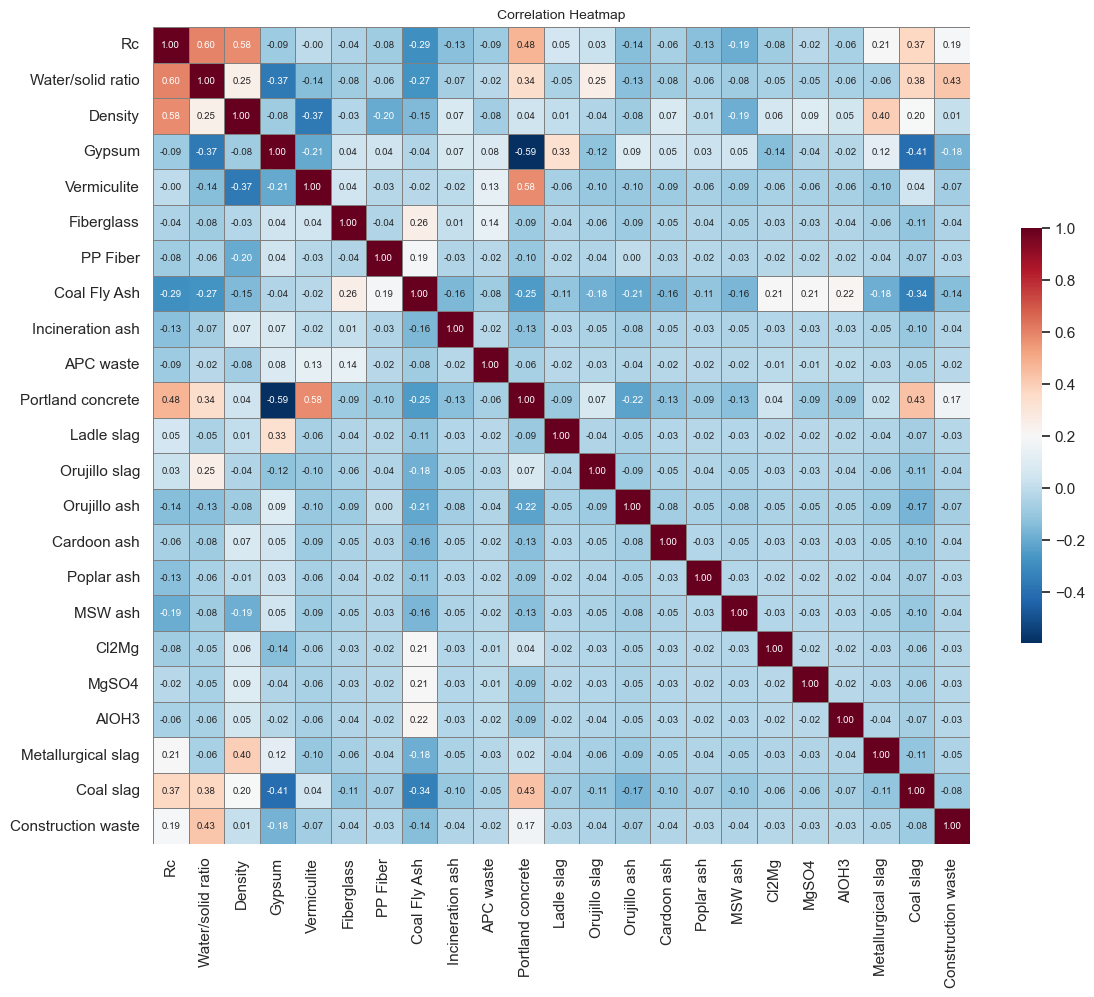

In [25]:
sns.set(style='white', palette='muted')

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', square=True, fmt='.2f', cbar_kws={'shrink': 0.5}, 
            annot_kws={'size': 7}, linewidths=0.5, linecolor='gray')

plt.title('Correlation Heatmap', fontsize=10)
plt.tight_layout()
plt.show()

## Dataset exportation 

Exporting to xlsx file for further analysis 

In [26]:
df.to_excel(path + 'CR_EDA.xlsx', index=False)